In [18]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')

In [20]:
from utils.paths import find

In [22]:
config = {}
config['analysis_save_dir'] = '/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721'

In [24]:
import os

In [104]:
# find all the text files that contain recording metadata
text_file_list = find('*.txt', config['analysis_save_dir'])
# remove vidclip files from the metadata list
vidclip_file_list = find('*vidclip*.txt', config['analysis_save_dir'])
for x in vidclip_file_list:
    text_file_list.remove(x)
# iterate through the text files
trial_count = 0
raw_pitch = {}
raw_div = {}
for trial_path in sorted(text_file_list):
    trial_count = trial_count + 1
    # read the trial metadata data in
    with open(trial_path) as f:
        trial_contents = f.read()
    trial_metadata = json.loads(trial_contents)
    # get the name of the file
    trial_path_noext = os.path.splitext(trial_path)[0]
    head, trial_name_long = os.path.split(trial_path_noext)
    trial_name = '_'.join(trial_name_long.split('_')[:-1])
    config['recording_name'] = trial_name; config['trial_head'] = head
    print('analyzing '+config['recording_name'])
    # get the metadata out of vidclip text file
    for time_text_path in vidclip_file_list:
        if trial_name in time_text_path:
            with open(time_text_path) as f:
                time_txt = f.read()
    time_dict = json.loads(time_txt)
    bin_group_keys = ['complete', 'early', 'jumpprep', 'late']
    # find the matching sets of .nc files produced during preprocessing
    for bin_group in bin_group_keys:
        if bin_group == 'complete':
            try:
                leye = xr.open_dataset([i for i in find((trial_name + '*_Leye.nc'), head) if 'early' not in i and 'jumpprep' not in i and 'late' not in i][0]).LEYE_ellipse_params
                reye = xr.open_dataset([i for i in find((trial_name + '*_Reye.nc'), head) if 'early' not in i and 'jumpprep' not in i and 'late' not in i][0]).REYE_ellipse_params
                side = xr.open_dataset([i for i in find((trial_name + '*_side.nc'), head) if 'early' not in i and 'jumpprep' not in i and 'late' not in i][0])
#                 top = xr.open_dataset([i for i in find((trial_name + '*_Top.nc'), head) if 'early' not in i and 'jumpprep' not in i and 'late' not in i][0]).to_array()
                last_complete_REYE_th =  np.rad2deg(np.nanmedian(reye.sel(ellipse_params='theta').values))
                last_complete_REYE_phi =  np.rad2deg(np.nanmedian(reye.sel(ellipse_params='phi').values))
                last_complete_LEYE_th =  np.rad2deg(np.nanmedian(leye.sel(ellipse_params='theta').values))
                last_complete_LEYE_phi =  np.rad2deg(np.nanmedian(leye.sel(ellipse_params='phi').values))
            except:
                pass
        else:
            try:
                leye = xr.open_dataset([i for i in find((trial_name + '*_Leye.nc'), head) if bin_group in i][0]).LEYE_ellipse_params
                reye = xr.open_dataset([i for i in find((trial_name + '*_Reye.nc'), head) if bin_group in i][0]).REYE_ellipse_params
                side = xr.open_dataset([i for i in find((trial_name + '*_side.nc'), head) if bin_group in i][0])
#                 top = xr.open_dataset([i for i in find((trial_name + '*_Top.nc'), head) if bin_group in i][0]).to_array()
            except:
                pass
        try:
            head_pitch = side.SIDE_theta
            pitch = np.rad2deg(head_pitch)
            pitch = ((pitch+360) % 360)
            raw_pitch[trial_name+'_'+bin_group] = pitch
            RTheta = np.rad2deg(reye.sel(ellipse_params='theta')) - last_complete_REYE_th
            RPhi = np.rad2deg(reye.sel(ellipse_params='phi')) - last_complete_REYE_phi
            LTheta = np.rad2deg(leye.sel(ellipse_params='theta')) - last_complete_LEYE_th
            LPhi = np.rad2deg(leye.sel(ellipse_params='phi')) - last_complete_LEYE_phi
            RTheta_interp = RTheta.interp_like(pitch, method='linear').values
            LTheta_interp = LTheta.interp_like(pitch, method='linear').values
            raw_div[trial_name+'_'+bin_group] = (RTheta_interp - LTheta_interp)
        except:
            pass

analyzing 071420_PV-CHR11P1LT_001
analyzing 071420_PV-CHR11P1LT_002
analyzing 071420_PV-CHR11P1LT_003
analyzing 071420_PV-CHR11P1LT_004
analyzing 071420_PV-CHR11P1LT_005
analyzing 071420_PV-CHR11P1LT_006
analyzing 071420_PV-CHR11P2LT_001
analyzing 071420_PV-CHR11P2LT_002
analyzing 071420_PV-CHR11P2LT_003
analyzing 071420_PV-CHR11P2LT_004
analyzing 071420_PV-CHR11P2LT_005
analyzing 071420_PV-CHR11P2LT_006
analyzing 071420_PV-CHR11P2LT_007
analyzing 071420_PV-CHR11P2LT_008
analyzing 071420_PV-CHR11P2RT_001
analyzing 071420_PV-CHR11P2RT_002
analyzing 071420_PV-CHR11P2RT_003
analyzing 071520_PV-CHR11P1LT_001
analyzing 071520_PV-CHR11P1LT_002
analyzing 071520_PV-CHR11P1LT_003
analyzing 071520_PV-CHR11P1LT_004
analyzing 071520_PV-CHR11P1LT_005
analyzing 071520_PV-CHR11P1LT_006
analyzing 071520_PV-CHR11P1LT_007
analyzing 071520_PV-CHR11P1LT_008
analyzing 071520_PV-CHR11P1LT_009
analyzing 071520_PV-CHR11P1LT_010
analyzing 071520_PV-CHR11P1LT_011
analyzing 071520_PV-CHR11P1LT_012
analyzing 0715

In [105]:
raw_div

{'071420_PV-CHR11P1LT_001_complete': array([-1.72594205e+01, -1.66928810e+01, -1.40760844e+01, -1.19107769e+01,
        -1.01870365e+01, -8.27068980e+00, -5.93601975e+00, -5.18696061e+00,
        -3.08603928e+00, -4.46737375e-02,  6.17208796e+00,  1.31491552e+01,
         1.92070663e+01,  2.24677654e+01,  2.58243368e+01,  3.02111878e+01,
         3.46396843e+01,  3.87108607e+01,  4.21838365e+01,  4.09580496e+01,
         3.74089139e+01,  3.60120988e+01,  3.55692810e+01,  3.29263183e+01,
         2.86744813e+01,  2.65429015e+01,  2.42099840e+01,  2.26070938e+01,
         2.04683753e+01,  1.90578491e+01,  1.33723071e+01,  9.49650439e+00,
         1.12281692e+01,  1.27830798e+01,  1.08066277e+01,  1.01220165e+01,
         9.12303200e+00,  8.09116991e+00,  7.31788916e+00,  6.88636269e+00,
         5.08891804e+00,  4.20796561e+00,  4.47968037e+00,  6.03388371e+00,
         9.54419900e+00,  1.12943514e+01,  1.10140483e+01,  9.88728270e+00,
         9.69733351e+00,  1.04260195e+01,  3.0318073

In [107]:
new_pitch_dict = dict()
for animal in animal_names:
    early = np.concatenate([val for key,val in raw_div.items() if animal in key and 'early' in key])
    prep = np.concatenate([val for key,val in raw_div.items() if animal in key and 'jumpprep' in key])
    early_mean = np.nanmean(early)
    prep_mean = np.nanmean(prep)
    early_sem = scipy.stats.sem(early, axis=None, nan_policy='omit')
    prep_sem = scipy.stats.sem(prep, axis=None, nan_policy='omit')
    new_pitch_dict.setdefault('early', {}).setdefault(animal, {})['mean'] = early_mean
    new_pitch_dict.setdefault('prep', {}).setdefault(animal, {})['mean'] = prep_mean
    new_pitch_dict.setdefault('early', {}).setdefault(animal, {})['sem'] = early_sem
    new_pitch_dict.setdefault('prep', {}).setdefault(animal, {})['sem'] = prep_sem

In [108]:
new_pitch_dict

{'early': {'PV-CHR11P2RT': {'mean': 1.0706969794297547,
   'sem': 0.11257486309449936},
  'J158BLT': {'mean': 2.6263190235361313, 'sem': 0.09256764359636846},
  'J157BRT': {'mean': 1.1665926747425652, 'sem': 0.1124639045390993},
  'PV-CHR11P1LT': {'mean': 1.8397331689557808, 'sem': 0.08796181720575638},
  'PV-CHR11P2LT': {'mean': 1.7442971212017935, 'sem': 0.08702011135490065},
  'J157BLT': {'mean': 1.127947614366473, 'sem': 0.09740759994071395},
  'PV-CHR11P1TT': {'mean': 1.917186989083244, 'sem': 0.15667497772704236},
  'J158BRT': {'mean': 2.6315513397995254, 'sem': 0.159949193901663}},
 'prep': {'PV-CHR11P2RT': {'mean': -0.5564097866119918,
   'sem': 0.12875360622543505},
  'J158BLT': {'mean': -2.7684901766157353, 'sem': 0.12049486722578624},
  'J157BRT': {'mean': -2.3886130238179923, 'sem': 0.1362526743175943},
  'PV-CHR11P1LT': {'mean': -1.0483267430296934, 'sem': 0.08874220826241079},
  'PV-CHR11P2LT': {'mean': -0.9069241404785504, 'sem': 0.10189548088658104},
  'J157BLT': {'mean

In [110]:
x = []; y = []
for animal in animal_names:
    x.append(new_pitch_dict['early'][animal]['mean'])
    y.append(new_pitch_dict['prep'][animal]['mean'])
stat, p = scipy.stats.ttest_rel(x, y)
new_pitch_dict['p_value'] = p

In [111]:
new_pitch_dict

{'early': {'PV-CHR11P2RT': {'mean': 1.0706969794297547,
   'sem': 0.11257486309449936},
  'J158BLT': {'mean': 2.6263190235361313, 'sem': 0.09256764359636846},
  'J157BRT': {'mean': 1.1665926747425652, 'sem': 0.1124639045390993},
  'PV-CHR11P1LT': {'mean': 1.8397331689557808, 'sem': 0.08796181720575638},
  'PV-CHR11P2LT': {'mean': 1.7442971212017935, 'sem': 0.08702011135490065},
  'J157BLT': {'mean': 1.127947614366473, 'sem': 0.09740759994071395},
  'PV-CHR11P1TT': {'mean': 1.917186989083244, 'sem': 0.15667497772704236},
  'J158BRT': {'mean': 2.6315513397995254, 'sem': 0.159949193901663}},
 'prep': {'PV-CHR11P2RT': {'mean': -0.5564097866119918,
   'sem': 0.12875360622543505},
  'J158BLT': {'mean': -2.7684901766157353, 'sem': 0.12049486722578624},
  'J157BRT': {'mean': -2.3886130238179923, 'sem': 0.1362526743175943},
  'PV-CHR11P1LT': {'mean': -1.0483267430296934, 'sem': 0.08874220826241079},
  'PV-CHR11P2LT': {'mean': -0.9069241404785504, 'sem': 0.10189548088658104},
  'J157BLT': {'mean

In [112]:
import json
with open('/home/niell_lab/data/jumping/raw_div_mean_sem.json', 'w') as fp:
    json.dump(new_pitch_dict, fp)

In [ ]:
pitch_props = dict()
for animal_count, animal_name in enumerate(animal_names):
    for window_count, window_name in enumerate(['all','early','preparatory']):
        window = [pooled, early, jumpprep][window_count]
        this_animal = window.filter_by_attrs(animal=animal_name).to_array()
        pitch = this_animal.sel(jump_params='head_pitch')
        pitch_props.setdefault(window_name, {}).setdefault(animal_name, {})['mean'] = np.nanmean(pitch)
        pitch_props.setdefault(window_name, {}).setdefault(animal_name, {})['sem'] = scipy.stats.sem(pitch, axis=None, nan_policy='omit')

In [ ]:
np.rad2deg(REye.sel(ellipse_params='theta'))

In [2]:
leye = xr.open_dataset('/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721/071420_PV-CHR11P1LT_001/071420_PV-CHR11P1LT_001Leye.nc')
leye

<xarray.Dataset>
Dimensions:              (ellipse_params: 7, frame: 582, height: 120, point_loc: 30, width: 160)
Coordinates:
  * frame                (frame) int64 0 1 2 3 4 5 6 ... 576 577 578 579 580 581
  * point_loc            (point_loc) object 'pt1_x' ... 'outer_likelihood'
    timestamps           (frame) float64 ...
  * ellipse_params       (ellipse_params) object 'theta' 'phi' ... 'ellipse_phi'
Dimensions without coordinates: height, width
Data variables:
    LEYE_pts             (frame, point_loc) float64 ...
    LEYE_ellipse_params  (frame, ellipse_params) float64 ...
    LEYE_video           (frame, height, width) int8 ...

In [3]:
side_ds = xr.open_dataset('/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721/071420_PV-CHR11P1LT_001/071420_PV-CHR11P1LT_001_side.nc')
side_ds

<xarray.Dataset>
Dimensions:     (frame: 582, height: 135, point_loc: 12, width: 180)
Coordinates:
  * frame       (frame) int64 0 1 2 3 4 5 6 7 ... 575 576 577 578 579 580 581
  * point_loc   (point_loc) object 'Nose_x' 'Nose_y' ... 'LCam_likelihood'
    timestamps  (frame) float64 ...
Dimensions without coordinates: height, width
Data variables:
    SIDE_pts    (point_loc, frame) float64 ...
    SIDE_theta  (frame) float64 ...
    SIDE_video  (frame, height, width) int8 ...

In [4]:
LEye = leye.LEYE_ellipse_params
head_pitch = side_ds.SIDE_theta
pitch = np.rad2deg(head_pitch)
pitch = ((pitch+360) % 360)
pitch = pitch - np.nanmean(pitch)
LTheta = np.rad2deg(LEye.sel(ellipse_params='theta')) -  np.rad2deg(np.nanmedian(LEye.sel(ellipse_params='theta')))
LPhi = (np.rad2deg(LEye.sel(ellipse_params='phi')) - np.rad2deg(np.nanmedian(LEye.sel(ellipse_params='phi'))))
LTheta_interp = LTheta.interp_like(pitch, method='linear')
LPhi_interp = LPhi.interp_like(pitch, method='linear')

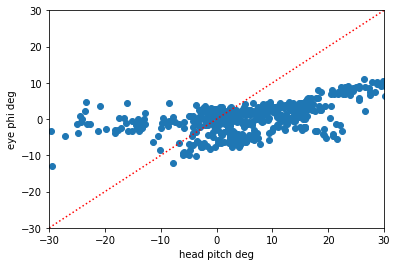

In [5]:
plt.ylabel('eye phi deg'); plt.xlabel('head pitch deg')
plt.plot([-30,30],[-30,30], 'r:')
plt.xlim([-30,30]); plt.ylim([-30,30])
plt.scatter(pitch, LPhi)

In [6]:
reye = xr.open_dataset('/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721/071420_PV-CHR11P1LT_001/071420_PV-CHR11P1LT_001Reye.nc')
reye

<xarray.Dataset>
Dimensions:              (ellipse_params: 7, frame: 582, height: 120, point_loc: 30, width: 160)
Coordinates:
  * frame                (frame) int64 0 1 2 3 4 5 6 ... 576 577 578 579 580 581
  * point_loc            (point_loc) object 'pt1_x' ... 'outer_likelihood'
    timestamps           (frame) float64 ...
  * ellipse_params       (ellipse_params) object 'theta' 'phi' ... 'ellipse_phi'
Dimensions without coordinates: height, width
Data variables:
    REYE_pts             (frame, point_loc) float64 ...
    REYE_ellipse_params  (frame, ellipse_params) float64 ...
    REYE_video           (frame, height, width) int8 ...

In [7]:
REye = reye.REYE_ellipse_params
RTheta = np.rad2deg(REye.sel(ellipse_params='theta')) -  np.rad2deg(np.nanmedian(REye.sel(ellipse_params='theta')))
RPhi = (np.rad2deg(REye.sel(ellipse_params='phi')) - np.rad2deg(np.nanmedian(REye.sel(ellipse_params='phi'))))
RTheta_interp = RTheta.interp_like(pitch, method='linear')
RPhi_interp = RPhi.interp_like(pitch, method='linear')

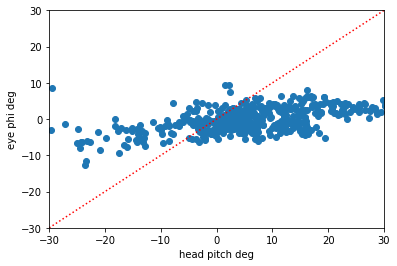

In [8]:
plt.ylabel('eye phi deg'); plt.xlabel('head pitch deg')
plt.plot([-30,30],[-30,30], 'r:')
plt.xlim([-30,30]); plt.ylim([-30,30])
plt.scatter(pitch, RPhi)

In [2]:
path = '/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721/pooled_jump_data.nc'

In [3]:
pooled = xr.open_dataset(path)

In [8]:
pooled

<xarray.Dataset>
Dimensions:                  (frame: 2172, jump_params: 7)
Coordinates:
  * frame                    (frame) int64 0 1 2 3 4 ... 2168 2169 2170 2171
  * jump_params              (jump_params) object 'head_pitch' ... 'th_phi'
Data variables:
    071420_PV-CHR11P1LT_001  (frame, jump_params) float64 ...
    071420_PV-CHR11P1LT_002  (frame, jump_params) float64 ...
    071420_PV-CHR11P1LT_003  (frame, jump_params) float64 ...
    071420_PV-CHR11P1LT_004  (frame, jump_params) float64 ...
    071420_PV-CHR11P1LT_005  (frame, jump_params) float64 ...
    071420_PV-CHR11P1LT_006  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_001  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_002  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_003  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_004  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_005  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_006  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_007  (frame, jump_params) float64 ...
    071420_PV-CHR11P2LT_008  (frame, jump_params) float64 ...
    071420_PV-CHR11P2RT_001  (frame, jump_params) float64 ...
    071420_PV-CHR11P2RT_002  (frame, jump_params) float64 ...
    071420_PV-CHR11P2RT_003  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_001  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_002  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_003  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_004  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_005  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_006  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_007  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_008  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_009  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_010  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_011  (frame, jump_params) float64 ...
    071520_PV-CHR11P1LT_012  (frame, jump_params) float64 ...
    071520_PV-CHR11P2LT_001  (frame, jump_params) float64 ...
    071520_PV-CHR11P2LT_002  (frame, jump_params) float64 ...
    071520_PV-CHR11P2LT_003  (frame, jump_params) float64 ...
    071520_PV-CHR11P2LT_004  (frame, jump_params) float64 ...
    071520_PV-CHR11P2LT_005  (frame, jump_params) float64 ...
    071520_PV-CHR11P2LT_006  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_001  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_002  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_003  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_004  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_005  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_006  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_007  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_008  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_009  (frame, jump_params) float64 ...
    071520_PV-CHR11P2RT_010  (frame, jump_params) float64 ...
    071620_J157BLT_001       (frame, jump_params) float64 ...
    071620_J157BLT_002       (frame, jump_params) float64 ...
    071620_J157BLT_003       (frame, jump_params) float64 ...
    071620_J157BLT_004       (frame, jump_params) float64 ...
    071620_J157BLT_005       (frame, jump_params) float64 ...
    071620_J157BLT_006       (frame, jump_params) float64 ...
    071620_J157BLT_007       (frame, jump_params) float64 ...
    071620_J157BLT_008       (frame, jump_params) float64 ...
    071620_J157BLT_009       (frame, jump_params) float64 ...
    071620_J157BLT_010       (frame, jump_params) float64 ...
    071620_J157BLT_011       (frame, jump_params) float64 ...
    071620_J157BLT_012       (frame, jump_params) float64 ...
    071620_J157BLT_013       (frame, jump_params) float64 ...
    071620_J157BLT_014       (frame, jump_params) float64 ...
    071620_J157BLT_015       (frame, jump_params) float64 ...
    071620_J157BRT_001

In [5]:
try:
    pooled_da = pooled.to_array()
except AttributeError:
    pooled_da = pooled

In [6]:
animal_names = list(set([i.split('_')[1] for i in list(pooled_da['variable'].values)]))

In [8]:
for var in pooled:
    pooled[var].attrs['animal'] = var.split('_')[1]

In [9]:
for var in early:
    early[var].attrs['animal'] = var.split('_')[1]

In [10]:
for var in jumpprep:
    jumpprep[var].attrs['animal'] = var.split('_')[1]

In [13]:
pitch_props = dict()
for animal_count, animal_name in enumerate(animal_names):
    for window_count, window_name in enumerate(['all','early','preparatory']):
        window = [pooled, early, jumpprep][window_count]
        this_animal = window.filter_by_attrs(animal=animal_name).to_array()
        pitch = this_animal.sel(jump_params='head_pitch')
        pitch_props.setdefault(window_name, {}).setdefault(animal_name, {})['mean'] = np.nanmean(pitch)
        pitch_props.setdefault(window_name, {}).setdefault(animal_name, {})['sem'] = scipy.stats.sem(pitch, axis=None, nan_policy='omit')

In [14]:
pitch_props

{'all': {'PV-CHR11P2RT': {'mean': -6.071701041108482e-16,
   'sem': 0.1320806456658373},
  'J158BLT': {'mean': 6.2327971827293904e-15, 'sem': 0.15242119122637385},
  'J157BRT': {'mean': 7.090413503870129e-16, 'sem': 0.17656879804168357},
  'PV-CHR11P1LT': {'mean': -3.7626849364128237e-16, 'sem': 0.0941126130358905},
  'PV-CHR11P2LT': {'mean': -2.1345245605079635e-15,
   'sem': 0.10981816097527818},
  'J157BLT': {'mean': 3.1624855509907496e-17, 'sem': 0.15949079177216754},
  'PV-CHR11P1TT': {'mean': 1.1056766567929488e-15, 'sem': 0.17587505825829391},
  'J158BRT': {'mean': 1.7538713097875891e-15, 'sem': 0.17479035978657037}},
 'early': {'PV-CHR11P2RT': {'mean': -8.497098382103966e-15,
   'sem': 0.21356683470729956},
  'J158BLT': {'mean': 3.901388496083309e-16, 'sem': 0.19903749145212},
  'J157BRT': {'mean': -3.640144843692919e-15, 'sem': 0.36522522561789444},
  'PV-CHR11P1LT': {'mean': -3.201003427233248e-16, 'sem': 0.1616837210634802},
  'PV-CHR11P2LT': {'mean': 1.250854269751694e-15, 

In [103]:
div_props = dict()
for animal_count, animal_name in enumerate(animal_names):
    for window_count, window_name in enumerate(['all','early','preparatory']):
        window = [pooled, early, jumpprep][window_count]
        this_animal = window.filter_by_attrs(animal=animal_name).to_array()
        div = this_animal.sel(jump_params='eye_th_div')
        div_props.setdefault(window_name, {}).setdefault(animal_name, {})['mean'] = np.nanmean(div)
        div_props.setdefault(window_name, {}).setdefault(animal_name, {})['sem'] = scipy.stats.sem(div, axis=None, nan_policy='omit')

In [113]:
div_props

{'all': {'J158BLT': {'mean': 0.2681085788516606, 'sem': 0.03956656922272957},
  'J157BLT': {'mean': 0.004653574319665784, 'sem': 0.04137012246232233},
  'J158BRT': {'mean': -0.21339023971147503, 'sem': 0.06314068880943463},
  'PV-CHR11P1TT': {'mean': 0.25797820102607083, 'sem': 0.063475638166854},
  'PV-CHR11P2LT': {'mean': 0.2748724354308406, 'sem': 0.03413644238907764},
  'PV-CHR11P1LT': {'mean': 0.16808232733367687, 'sem': 0.032201865006220715},
  'PV-CHR11P2RT': {'mean': 0.35268434240749386, 'sem': 0.04486762021918787},
  'J157BRT': {'mean': 0.22753020350354666, 'sem': 0.04731653382631196}},
 'early': {'J158BLT': {'mean': -0.028111785890639576,
   'sem': 0.04968603683911647},
  'J157BLT': {'mean': 0.17309650502805238, 'sem': 0.060791600663909276},
  'J158BRT': {'mean': -0.013108690831901386, 'sem': 0.08691203837853471},
  'PV-CHR11P1TT': {'mean': 0.16070743972630216, 'sem': 0.11187303850072587},
  'PV-CHR11P2LT': {'mean': 0.47789353634895293, 'sem': 0.04855626426943009},
  'PV-CHR1

In [15]:
x = []; y = []
for animal in animal_names:
    x.append(pitch_props['early'][animal]['mean'])
    y.append(pitch_props['preparatory'][animal]['mean'])
stat, p = scipy.stats.ttest_rel(x, y)
pitch_props['p_value'] = p

In [ ]:
x = []; y = []
for animal in animal_names:
    x.append(div_props['early'][animal]['mean'])
    y.append(div_props['preparatory'][animal]['mean'])
stat, p = scipy.stats.ttest_rel(x, y)

In [114]:
div_props['p_value'] = p

In [115]:
div_props

{'all': {'J158BLT': {'mean': 0.2681085788516606, 'sem': 0.03956656922272957},
  'J157BLT': {'mean': 0.004653574319665784, 'sem': 0.04137012246232233},
  'J158BRT': {'mean': -0.21339023971147503, 'sem': 0.06314068880943463},
  'PV-CHR11P1TT': {'mean': 0.25797820102607083, 'sem': 0.063475638166854},
  'PV-CHR11P2LT': {'mean': 0.2748724354308406, 'sem': 0.03413644238907764},
  'PV-CHR11P1LT': {'mean': 0.16808232733367687, 'sem': 0.032201865006220715},
  'PV-CHR11P2RT': {'mean': 0.35268434240749386, 'sem': 0.04486762021918787},
  'J157BRT': {'mean': 0.22753020350354666, 'sem': 0.04731653382631196}},
 'early': {'J158BLT': {'mean': -0.028111785890639576,
   'sem': 0.04968603683911647},
  'J157BLT': {'mean': 0.17309650502805238, 'sem': 0.060791600663909276},
  'J158BRT': {'mean': -0.013108690831901386, 'sem': 0.08691203837853471},
  'PV-CHR11P1TT': {'mean': 0.16070743972630216, 'sem': 0.11187303850072587},
  'PV-CHR11P2LT': {'mean': 0.47789353634895293, 'sem': 0.04855626426943009},
  'PV-CHR1

In [16]:
pitch_props

{'all': {'PV-CHR11P2RT': {'mean': -6.071701041108482e-16,
   'sem': 0.1320806456658373},
  'J158BLT': {'mean': 6.2327971827293904e-15, 'sem': 0.15242119122637385},
  'J157BRT': {'mean': 7.090413503870129e-16, 'sem': 0.17656879804168357},
  'PV-CHR11P1LT': {'mean': -3.7626849364128237e-16, 'sem': 0.0941126130358905},
  'PV-CHR11P2LT': {'mean': -2.1345245605079635e-15,
   'sem': 0.10981816097527818},
  'J157BLT': {'mean': 3.1624855509907496e-17, 'sem': 0.15949079177216754},
  'PV-CHR11P1TT': {'mean': 1.1056766567929488e-15, 'sem': 0.17587505825829391},
  'J158BRT': {'mean': 1.7538713097875891e-15, 'sem': 0.17479035978657037}},
 'early': {'PV-CHR11P2RT': {'mean': -8.497098382103966e-15,
   'sem': 0.21356683470729956},
  'J158BLT': {'mean': 3.901388496083309e-16, 'sem': 0.19903749145212},
  'J157BRT': {'mean': -3.640144843692919e-15, 'sem': 0.36522522561789444},
  'PV-CHR11P1LT': {'mean': -3.201003427233248e-16, 'sem': 0.1616837210634802},
  'PV-CHR11P2LT': {'mean': 1.250854269751694e-15, 

In [17]:
import json
with open('/home/niell_lab/data/jumping/pitch_mean_sem.json', 'w') as fp:
    json.dump(pitch_props, fp)

In [116]:
import json
with open('/home/niell_lab/data/jumping/div_mean_sem.json', 'w') as fp:
    json.dump(div_props, fp)

In [9]:
lags = range(-30, 30)

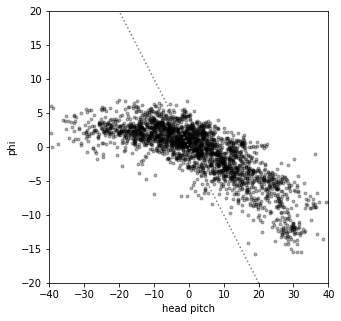

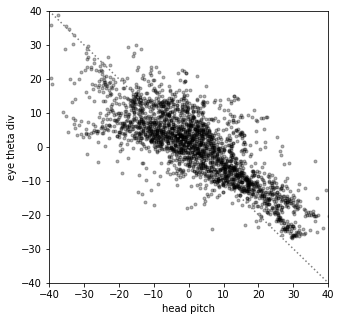

In [10]:
try:
    pooled_da = pooled.to_array()
except AttributeError:
    pooled_da = pooled
all_pitch = pooled_da.sel(jump_params='head_pitch').values
all_phi = - pooled_da.sel(jump_params='mean_eye_phi').values
all_div = pooled_da.sel(jump_params='eye_th_div').values * 2
lags = range(-30, 30)
dwnspl = 50
# head theta, phi
plt.figure(figsize=(5,5))
plt.plot(all_pitch[::dwnspl], all_phi[::dwnspl], 'k.', alpha=0.3)
plt.xlabel('head pitch'); plt.ylabel('phi')
plt.xlim([-40,40]); plt.ylim([-20,20])
plt.plot([-40,40],[40,-40],':',color=[0.5,0.5,0.5])
plt.show()
# head theta, eye theta divergence
plt.figure(figsize=(5,5))
plt.plot(all_pitch[::dwnspl], all_div[::dwnspl], 'k.', alpha=0.3)
plt.xlabel('head pitch'); plt.ylabel('eye theta div')
plt.xlim([-40,40]); plt.ylim([-40,40])
plt.plot([-40,40],[40,-40],':',color=[0.5,0.5,0.5])
plt.show()

In [12]:
import scipy.stats

In [36]:
r2 = dict()

In [37]:
mask = ~np.isnan(all_pitch) & ~np.isnan(all_phi)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(all_pitch[mask].flatten(), all_phi[mask].flatten())
r2['full_pitch_phi'] = r_value**2

In [38]:
mask = ~np.isnan(all_pitch) & ~np.isnan(all_div)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(all_pitch[mask].flatten(), all_div[mask].flatten())
r2['full_pitch_div'] = r_value**2

In [7]:
early = xr.open_dataset('/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721/early_pooled_jump_data.nc')
jumpprep = xr.open_dataset('/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721/jumpprep_pooled_jump_data.nc')

In [29]:
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

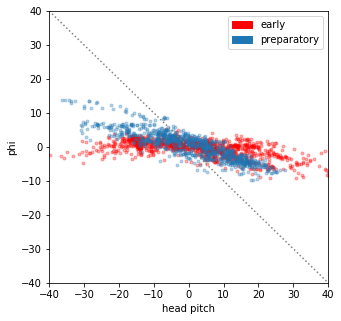

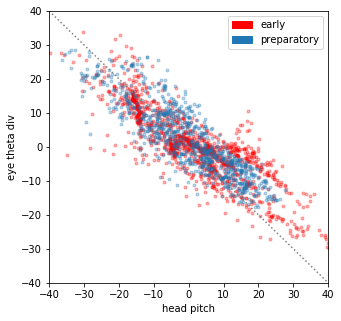

In [30]:
early_da = early.to_array()
jumpprep_da = jumpprep.to_array()
early_pitch = early_da.sel(jump_params='head_pitch').values
early_phi = - early_da.sel(jump_params='mean_eye_phi').values
early_div = early_da.sel(jump_params='eye_th_div').values * 2
jumpprep_pitch = jumpprep_da.sel(jump_params='head_pitch').values
jumpprep_phi = - jumpprep_da.sel(jump_params='mean_eye_phi').values
jumpprep_div = jumpprep_da.sel(jump_params='eye_th_div').values * 2
lags = range(-30, 30)
dwnspl = 50

blackpatch = mpatches.Patch(color='r', label='early')
redpatch = mpatches.Patch(color='tab:blue', label='preparatory')

# head theta, phi
plt.figure(figsize=(5,5))
plt.plot(early_pitch[::dwnspl], early_phi[::dwnspl], 'r.', alpha=0.3)
plt.plot(jumpprep_pitch[::dwnspl], jumpprep_phi[::dwnspl], '.', color='tab:blue', alpha=0.3)
plt.xlabel('head pitch'); plt.ylabel('phi')
plt.xlim([-40,40]); plt.ylim([-40,40])
plt.plot([-40,40],[40,-40],':',color=[0.5,0.5,0.5])
plt.legend(handles=[blackpatch, redpatch])
plt.show()
# head theta, eye theta divergence
plt.figure(figsize=(5,5))
plt.plot(early_pitch[::dwnspl], early_div[::dwnspl], 'r.', alpha=0.3)
plt.plot(jumpprep_pitch[::dwnspl], jumpprep_div[::dwnspl], '.', color='tab:blue', alpha=0.3)
plt.xlabel('head pitch'); plt.ylabel('eye theta div')
plt.xlim([-40,40]); plt.ylim([-40,40])
plt.plot([-40,40],[40,-40],':',color=[0.5,0.5,0.5])
plt.legend(handles=[blackpatch, redpatch])
pdf = PdfPages('/home/niell_lab/Documents/figures/jumping/div_pitch_early_vs_prep.pdf')
pdf.savefig()
pdf.close()

In [39]:
mask = ~np.isnan(early_pitch) & ~np.isnan(early_phi)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(early_pitch[mask].flatten(), early_phi[mask].flatten())
r2['early_pitch_phi'] = r_value**2

In [40]:
mask = ~np.isnan(jumpprep_pitch) & ~np.isnan(jumpprep_phi)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(jumpprep_pitch[mask].flatten(), jumpprep_phi[mask].flatten())
r2['prep_pitch_phi'] = r_value**2

In [41]:
mask = ~np.isnan(early_pitch) & ~np.isnan(early_div)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(early_pitch[mask].flatten(), early_div[mask].flatten())
r2['early_pitch_div'] = r_value**2

In [42]:
mask = ~np.isnan(jumpprep_pitch) & ~np.isnan(jumpprep_div)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(jumpprep_pitch[mask].flatten(), jumpprep_div[mask].flatten())
r2['prep_pitch_div'] = r_value**2

In [43]:
r2

{'full_pitch_phi': 0.4374953093768691,
 'full_pitch_div': 0.5921879771855431,
 'early_pitch_phi': 0.2846181825923824,
 'prep_pitch_phi': 0.5350535562100076,
 'early_pitch_div': 0.5097257906362277,
 'prep_pitch_div': 0.6986431665030831}

In [44]:
import json
with open('/home/niell_lab/data/jumping/correlation_r2.json', 'w') as fp:
    json.dump(r2, fp)

In [51]:
mean_early_div = np.mean(early_div)
stderr_early_div = np.std(early_div) / np.sqrt(len(early_div))

In [17]:
def mean_within_animal2(data):
    time_sel = data.sel(frame=range(60))
    data_mean = time_sel.mean(dim='variable',skipna=True)
    out = []
    for var in data_mean:
        out.append(list(data_mean[var].values))
    return np.array(out)

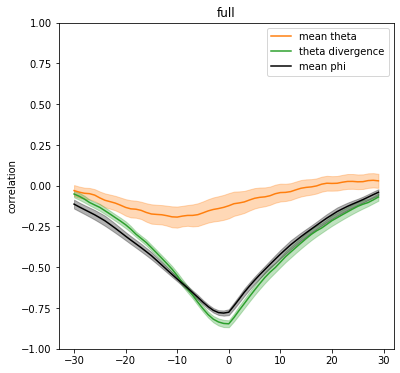

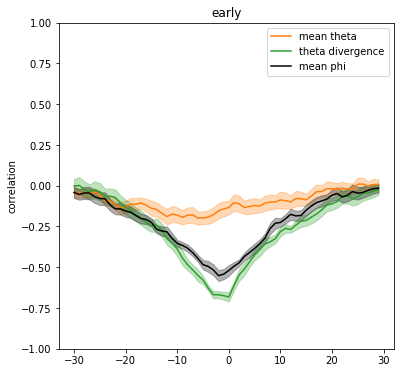

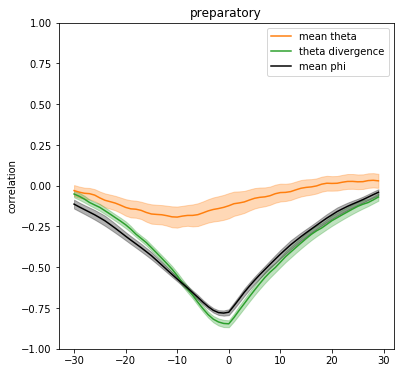

In [49]:
err = np.zeros(3)
for index in range(3):
    pooled = [pooled, early, jumpprep][index]
    label = ['full','early','preparatory'][index]
    # organize data for head xcorr with th, divergence, and phi (grouped within each animal's jumps)
    try:
        animal_names = list(set([i.split('_')[1] for i in list(pooled_da.variables.values)]))
    except:
        animal_names = list(set([i.split('_')[1] for i in list(pooled_da['variable'].values)]))
    for var in pooled:
        pooled[var].attrs['animal'] = var.split('_')[1]

    pool_by_animal = xr.Dataset()
    for animal_name in animal_names:
        this_animal = pooled.filter_by_attrs(animal=animal_name).to_array()
        this_animal.name = animal_name
        pool_by_animal = xr.merge([pool_by_animal, this_animal])

    ani_th_gaze = mean_within_animal2(pool_by_animal.sel(jump_params='th_gaze'))
    ani_th_div = mean_within_animal2(pool_by_animal.sel(jump_params='th_div'))
    ani_th_phi = - mean_within_animal2(pool_by_animal.sel(jump_params='th_phi'))
    # plot head xcorr
    plt.figure(figsize=(6,6))
    y1 = np.mean(ani_th_gaze,0)
    err1 = np.std(np.array(ani_th_gaze,dtype=np.float64),0)/np.sqrt(np.size(ani_th_gaze,0))
    y2 = np.mean(ani_th_div,0)
    err2 = np.std(np.array(ani_th_div,dtype=np.float64),0)/np.sqrt(np.size(ani_th_div,0))
    y3 = np.mean(ani_th_phi,0)
    err3 = np.std(np.array(ani_th_phi,dtype=np.float64),0)/np.sqrt(np.size(ani_th_phi,0))
    plt.plot(lags, y1, 'C1')
    plt.fill_between(lags, y1-err1, y1+err1, color='C1', alpha=0.3)
    plt.plot(lags, y2, 'C2')
    plt.fill_between(lags, y2-err2, y2+err2, color='C2', alpha=0.3)
    plt.plot(lags, y3, 'k')
    plt.fill_between(lags, y3-err3, y3+err3, color='k', alpha=0.3)
    plt.ylim([-1,1]); plt.ylabel('correlation'); plt.title(label)
    plt.legend(['mean theta', 'theta divergence', 'mean phi'])
    pdf = PdfPages('/home/niell_lab/Documents/figures/jumping/correlations_'+label+'.pdf')
    pdf.savefig()
    pdf.close()
    err[index] = np.mean(err2)

In [20]:
err

array([0.02452173, 0.03779151, 0.02452173])

In [23]:
def mean_within_animal(data):
    time_sel = data.sel(frame=range(60))
    data_mean = time_sel.to_array().mean(dim='variable',skipna=True)
    return(np.array(data_mean))

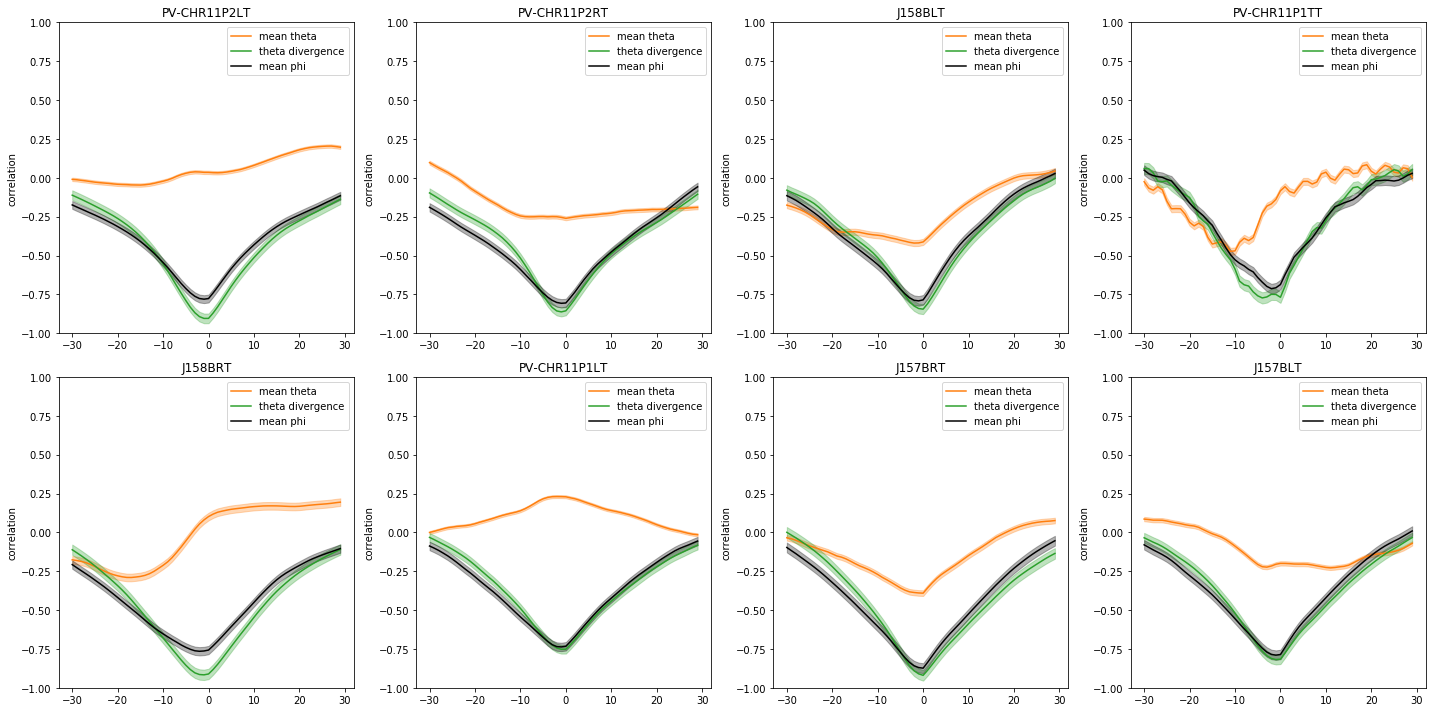

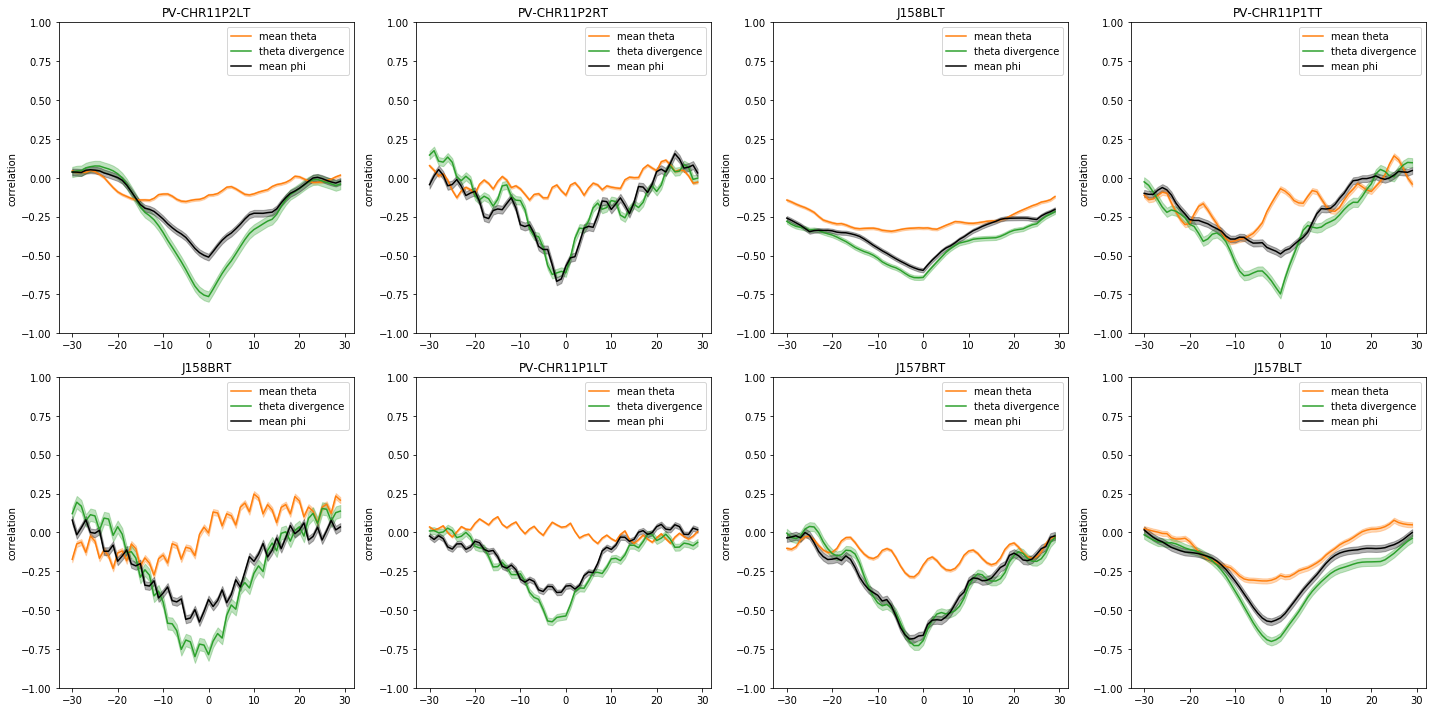

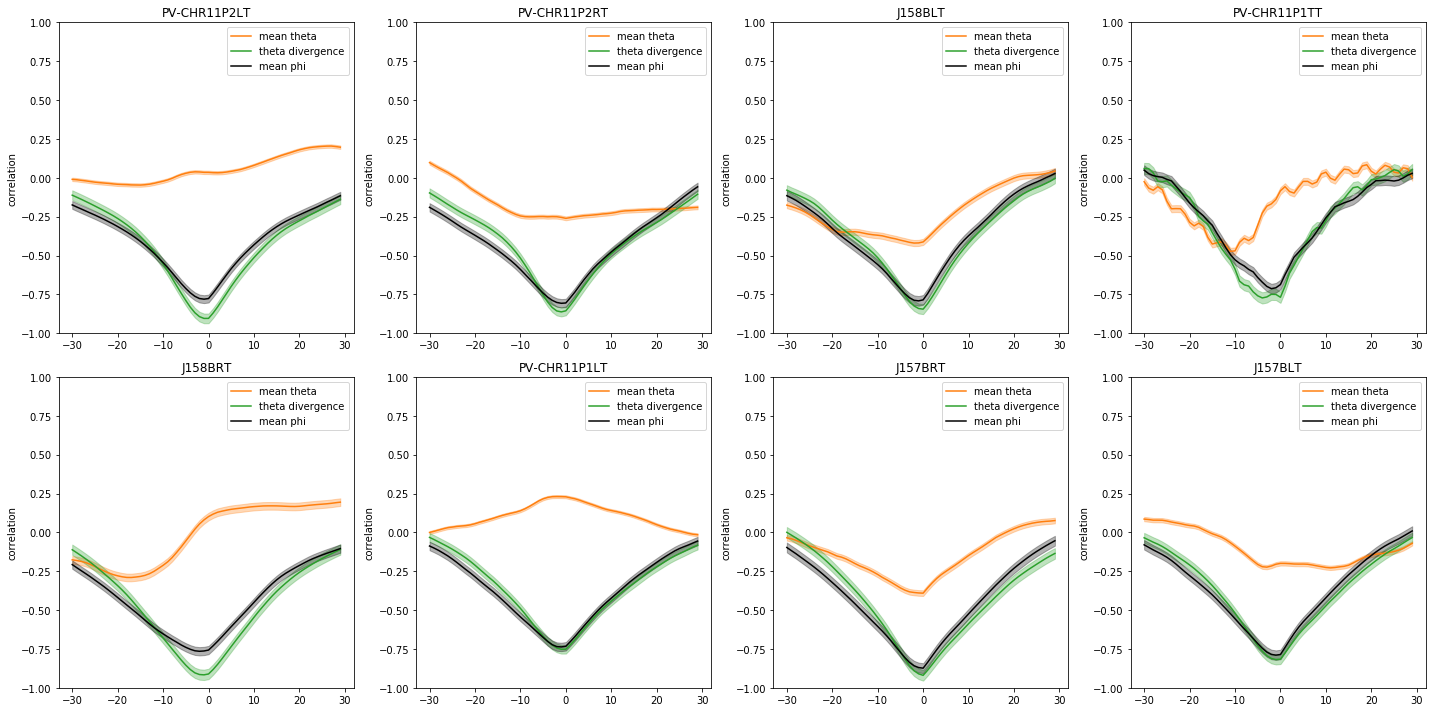

In [27]:
err = {'full':{},
      'early':{},
      'preparatory':{}}
for index in range(3):
    pooled = [pooled, early, jumpprep][index]
    label = ['full','early','preparatory'][index]

    plt.subplots(2,4,figsize=(20,10))
    count = 0
    for animal_name in animal_names:
        count += 1
        count1 = 0
        for var in list(pooled.keys()):
            if pooled[var].attrs['animal']==animal_name:
                if count1 == 0:
                    this_animal = pooled[var].to_dataset()
                    count1 += 1
                else:
                    this_animal = xr.merge([this_animal, pooled[var]])


        ani_th_gaze = mean_within_animal(this_animal.sel(jump_params='th_gaze'))
        ani_th_div = mean_within_animal(this_animal.sel(jump_params='th_div'))
        ani_th_phi = - mean_within_animal(this_animal.sel(jump_params='th_phi'))

        # plot head xcorr
        y1 = ani_th_gaze
        err1 = np.std(np.array(ani_th_gaze,dtype=np.float64),0)/np.sqrt(np.size(ani_th_gaze,0))
        y2 = ani_th_div
        err2 = np.std(np.array(ani_th_div,dtype=np.float64),0)/np.sqrt(np.size(ani_th_div,0))
        y3 = ani_th_phi
        err3 = np.std(np.array(ani_th_phi,dtype=np.float64),0)/np.sqrt(np.size(ani_th_phi,0))
        plt.subplot(2,4,count)
        plt.plot(lags, y1, 'C1')
        plt.fill_between(lags, y1-err1, y1+err1, color='C1', alpha=0.3)
        plt.plot(lags, y2, 'C2')
        plt.fill_between(lags, y2-err2, y2+err2, color='C2', alpha=0.3)
        plt.plot(lags, y3, 'k')
        plt.fill_between(lags, y3-err3, y3+err3, color='k', alpha=0.3)
        plt.ylim([-1,1]); plt.ylabel('correlation'); plt.title(animal_name)
        plt.legend(['mean theta', 'theta divergence', 'mean phi'])
        err[label][animal_name] = np.mean(err2)
    plt.tight_layout()
    plt.show()

In [40]:
import scipy.stats

In [42]:
import json
with open('/home/niell_lab/data/jumping/div_corr_stderr.json', 'w') as fp:
    json.dump(err, fp)

In [41]:
scipy.stats.ttest_rel([val for key,val in err['early'].items()],[val for key,val in err['preparatory'].items()])

Ttest_relResult(statistic=-1.8018048122224446, pvalue=0.11458137522857355)

In [102]:
np.min(y3)

-0.7217853615053476

In [103]:
err3[np.argmin(y3)]

0.016266802202709218

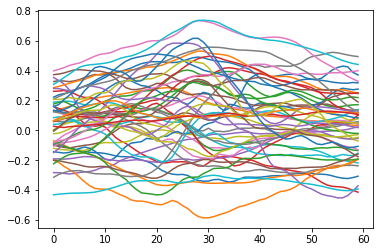

In [88]:
plt.plot(np.array(this_animal.sel(jump_params='th_gaze').to_array()).T)